<a href="https://colab.research.google.com/github/isaque48/lab2-redes/blob/main/lab2_REDES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementação da PARTE 2**

In [9]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

    def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
      """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + len(gerador_bits)
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

In [8]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


**Implementação PARTE 3**

In [7]:
pip install crc

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 4500 bytes...
Analisando para mensagem de 9000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.5134799870002098, 'mem_pico_manual': 105.7587890625, 'tempo_lib': 0.16260263100048178, 'mem_pico_lib': 51.19140625}, {'tamanho': 4500, 'tempo_manual': 1.1371031569997285, 'mem_pico_manual': 327.7646484375, 'tempo_lib': 0.2212620029995378, 'mem_pico_lib': 5.25}, {'tamanho': 9000, 'tempo_manual': 1.86363093700038, 'mem_pico_manual': 633.1025390625, 'tempo_lib': 0.4413225970001804, 'mem_pico_lib': 5.802734375}, {'tamanho': 16000, 'tempo_manual': 3.2369335590001356, 'mem_pico_manual': 1125.2900390625, 'tempo_lib': 0.7888636870002301, 'mem_pico_lib': 42.986328125}]


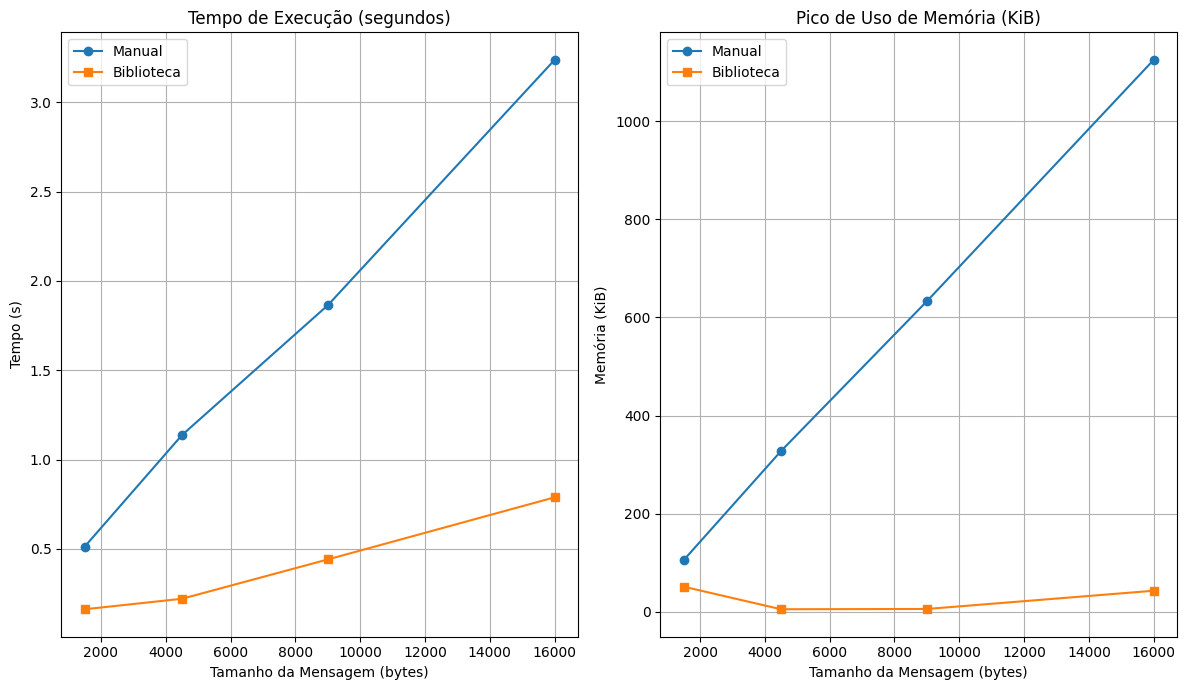

In [ ]:
import time
import tracemalloc
import os
import matplotlib.pyplot as plot
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

# Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 4500 , 9000, 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS

    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_manual = end_time - start_time

    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_lib = calculator_lib.checksum(mensagem_bytes)

    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_lib = end_time - start_time

    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

# Criação dos Gráficos:

tamanhos = [l["tamanho"] for l in resultados]
tempos_manual = [l["tempo_manual"] for l in resultados]
tempos_lib = [l["tempo_lib"] for l in resultados]
mem_manual = [l["mem_pico_manual"] for l in resultados]
mem_lib = [l["mem_pico_lib"] for l in resultados]

plot.figure(figsize=(12, 7))

# Gráfico 1:
plot.subplot(1, 2, 1)
plot.plot(tamanhos, tempos_manual, marker='o', label="Manual")
plot.plot(tamanhos, tempos_lib, marker='s', label="Biblioteca")
plot.title("Tempo de Execução (segundos)")
plot.xlabel("Tamanho da Mensagem (bytes)")
plot.ylabel("Tempo (s)")
plot.legend()
plot.grid(True)

# Gráfico 2:
plot.subplot(1, 2, 2)
plot.plot(tamanhos, mem_manual, marker='o', label="Manual")
plot.plot(tamanhos, mem_lib, marker='s', label="Biblioteca")
plot.title("Pico de Uso de Memória (KiB)")
plot.xlabel("Tamanho da Mensagem (bytes)")
plot.ylabel("Memória (KiB)")
plot.legend()
plot.grid(True)

plot.tight_layout()
plot.show()

Configurações da meu computador:

---


Processador: Intel Core i7-13700HX

---


RAM: 16GB

---


Placa de Vídeo: RTX 4060

**Comentarios comparando as duas implementações:**

---
**Analise do desempenho de tempo:** A implementação manual teve um desempenho inferior comparado a biblioteca crc. Desde mensagens pequenas até as maiores, a versão manual levou mais tempo para calcular o CRC. Isso se deve ao fato que a implementação manual trabalha com strings e com operações de listas utilizando python. Já a biblioteca crc, por ser implementada em C, consegue realizar as mesmas operações de maneira mais otimizada.

---

**Analise do uso de memória:** A implementação manual consome mais memória que a biblioteca crc, em todos os tamanhos de mensagens testados. Isso ocorre principalmente pelo fato da implementação manual manipular várias strings intermediarias, o que gera cópias adicionais em memória. Já a biblioteca crc trabalha diretamente com os dados em formato de byts, tornando o uso de memória mais eficiente.

**Implementação PARTE 4**

4.1
a) Meu nome: Isaque

nome = Isaque -> 010010010111001101100001011100010111010101100101

b)Como minha matrícula é 123110685 e terminar em 5 então, o meu gerador pessoal será: 10001000000100001, seguindo o padrão CRC/ARC

Com isso precisamos calcular o crc, para poder preencher a planilha

In [320]:
mensagem_base = "010010010111001101100001011100010111010101100101"
gerador = "10001000000100001"

crc = calcular_crc_manual(mensagem_base, gerador)
print(crc)

1101101001010111


Logo, a planilha preenchida fica:


MENSAGEM: "Isaque"

MENSAGEM_BASE: 010010010111001101100001011100010111010101100101

CRC: 1101101001010111




In [194]:
def padrao_erro(pos, n_rajada, tamanho_quadro):
  prefixo_zero = '0' * pos
  rajada = '1' * n_rajada
  sufixo_zero = '0' * (tamanho_quadro - (pos + n_rajada))
  return prefixo_zero + rajada + sufixo_zero

TESTE 1

In [339]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 1, com rajada de 5 bits
padrao_erro_1 = padrao_erro(0,5,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)

print(padrao_erro_1)

print("TESTE 1: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)


1111100000000000000000000000000000000000000000000000000000000000
TESTE 1: 
0101001101010111
33708


TESTE 2

In [341]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 2, com rajada de 10 bits
padrao_erro_1 = padrao_erro(1,10,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 2: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)

0111111111100000000000000000000000000000000000000000000000000000
TESTE 2: 
0111000100101101
51972


TESTE 3

In [342]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 7, com rajada de 15 bits
padrao_erro_1 = padrao_erro(6,15,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 3: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)

0000001111111111111110000000000000000000000000000000000000000000
TESTE 3: 
1111000111111010
50168


TESTE 4

In [343]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 9, com rajada de 20 bits
padrao_erro_1 = padrao_erro(8,20,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 4: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib)

0000000011111111111111111111000000000000000000000000000000000000
TESTE 4: 
1100111010011000
29945


TESTE 5

In [344]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 12, com rajada de 28 bits
padrao_erro_1 = padrao_erro(11,28,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 5: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

0000000000011111111111111111111111111110000000000000000000000000
TESTE 5: 
1000111010010101
21373 



TESTE 6

In [345]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 10, com rajada de 22 bits
padrao_erro_1 = padrao_erro(9,22,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 6: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

0000000001111111111111111111111000000000000000000000000000000000
TESTE 6: 
1010101011001001
32017 



TESTE 7

In [352]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 19, com rajada de 30 bits
padrao_erro_1 = padrao_erro(18,30,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 7: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

0000000000000000001111111111111111111111111111110000000000000000
TESTE 7: 
0011010011100000
24243 



TESTE 8

In [347]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 3, com rajada de 30 bits
padrao_erro_1 = padrao_erro(2,30,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 8: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")


0011111111111111111111111111111100000000000000000000000000000000
TESTE 8: 
0011010001111111
8686 



TESTE 9

In [348]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 5, com rajada de 19 bits
padrao_erro_1 = padrao_erro(4,19,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 9: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

0000111111111111111111100000000000000000000000000000000000000000
TESTE 9: 
0110110110101100
61688 



TESTE 10

In [349]:
from crc import Calculator, Crc16

mensagem_base = "010010010111001101100001011100010111010101100101"
crc = "1101101001010111"
QUADRO_TRANSMITIDO = mensagem_base + crc
calculator = Calculator(Crc16.MODBUS)

#Erro na Posição 8, com rajada de 31 bits
padrao_erro_1 = padrao_erro(7,31,len(QUADRO_TRANSMITIDO))
QUADRO_CORROMPIDO_1 = xor_bits(QUADRO_TRANSMITIDO,padrao_erro_1)
print(padrao_erro_1)

print("TESTE 10: ")
crc_man = calcular_crc_manual(QUADRO_CORROMPIDO_1, gerador)
print(crc_man)

corrompido_bytes = int(QUADRO_CORROMPIDO_1, 2).to_bytes(len(QUADRO_CORROMPIDO_1) // 8, byteorder='big')
crc_lib = calculator.checksum(corrompido_bytes)
print(crc_lib, "\n")

0000000111111111111111111111111111111100000000000000000000000000
TESTE 10: 
0011110011001101
59740 



**RELATORIO FINAL**


---
TESTE 1:

  POSIÇÃO: 1

  PADRÃO DE ERRO: 1111100000000000000000000000000000000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 2:

  POSIÇÃO: 2
  
  PADRÃO DE ERRO: 0111111111100000000000000000000000000000000000000000000000000000
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 3:

  POSIÇÃO: 7

  PADRÃO DE ERRO: 0000001111111111111110000000000000000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM
  
---
TESTE 4:

  POSIÇÃO: 9
  
  PADRÃO DE ERRO: 0000000011111111111111111111000000000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 5:

  POSIÇÃO: 12

  PADRÃO DE ERRO: 0000000000011111111111111111111111111110000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 6:

  POSIÇÃO: 10
  
  PADRÃO DE ERRO: 0000000001111111111111111111111000000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 7:

  POSIÇÃO: 19

  PADRÃO DE ERRO: 0000000000000000001111111111111111111111111111110000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM
  
---
TESTE 8:

  POSIÇÃO: 3
  
  PADRÃO DE ERRO: 0011111111111111111111111111111100000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM

---
TESTE 9:

  POSIÇÃO: 5

  PADRÃO DE ERRO: 0000111111111111111111100000000000000000000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM
  
---
TESTE 10:

  POSIÇÃO: 8
  
  PADRÃO DE ERRO: 0000000111111111111111111111111111111100000000000000000000000000

  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO MANUAL? SIM
  
  ERRO FOI DETECTADO NA IMPLEMENTAÇÃO DA BIBLIOTECA? SIM



Durante meus testes, eu testei centenas de vezes e em nenhuma das vezes as implementações falharam em detectar os erros, não sei se acabei fazendo algo de errado. Enfim todos os testes que realizei ambas as implementações acertaram todas as vezes em identificar os erros nas transmissões, visto que em todos os testes o CRC deu diferente de zero.

Ademais, por mais que eu não tenha conseguido achar nenhum teste em que as implementações falharam em detectar os erros, o CRC possui sim limites e não é sempre que os erros serão detectados, pode acontecer casos em que os erros não serão detectados e passarão para o destino final. Além disso, o CRC não é capaz de corrigir erros e sua eficiência depende do polinômio gerador, fatos esses que também limitam o CRC.

Por fim, não encontrei nenhuma diferença entre a implementação manual e a implementação da biblioteca, ambas tiveram o mesmo comportamento nos testes e forneceram resultados corretos. Com isso, por mais que eu não tenha conseguido forçar um erro passando despercebido, sei que ele são possiveis, o que reforça que o CRC não é infalível.